<a href="https://colab.research.google.com/github/sharibhumayun/practice/blob/main/Mrsool_CX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path ='https://raw.githubusercontent.com/sharibhumayun/practice/main/Masterdatabase.csv'
df= pd.read_csv(path)
df.head()

,Region,Main_brand,Category,Age,Gender,Nationality,OSAT,Communication,Ontime,Proposition,Delivery_fees,Restaurant_options,Grocery_options,Ease_usage,Delivery_process,App_sat,time_deliveryboy,Customer_support,Payment_process,Paying_,Product_quality
0,Western,HungerStation,Restaurants,30-39,Male,Expat Arabs,8,6.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,6.0,7.0,6.0,8.0,7.0
1,Western,HungerStation,Restaurants,30-39,Female,Nationals,9,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,10.0
2,Western,HungerStation,Restaurants,30-39,Male,Nationals,10,9.0,8.0,10.0,NaN,10.0,9.0,10.0,NaN,10.0,9.0,10.0,NaN,9.0,10.0
3,Western,HungerStation,Restaurants,40-49,Male,Expat Asians,7,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0
4,Central,HungerStation,Restaurants,30-39,Female,Nationals,6,8.0,7.0,7.0,6.0,6.0,6.0,5.0,7.0,7.0,5.0,6.0,6.0,6.0,6.0


In [3]:
df.shape

(3581, 21)

In [4]:
df.dtypes

Region                 object
Main_brand             object
Category               object
Age                    object
Gender                 object
Nationality            object
OSAT                   object
Communication         float64
Ontime                float64
Proposition           float64
Delivery_fees         float64
Restaurant_options    float64
Grocery_options       float64
Ease_usage            float64
Delivery_process      float64
App_sat               float64
time_deliveryboy      float64
Customer_support      float64
Payment_process       float64
Paying_               float64
Product_quality       float64
dtype: object

In [5]:
df["OSAT"] = pd.to_numeric(df.OSAT, errors='coerce')
df.dtypes

Region                 object
Main_brand             object
Category               object
Age                    object
Gender                 object
Nationality            object
OSAT                  float64
Communication         float64
Ontime                float64
Proposition           float64
Delivery_fees         float64
Restaurant_options    float64
Grocery_options       float64
Ease_usage            float64
Delivery_process      float64
App_sat               float64
time_deliveryboy      float64
Customer_support      float64
Payment_process       float64
Paying_               float64
Product_quality       float64
dtype: object

In [6]:
df.isnull().sum()

Region                  0
Main_brand              0
Category                0
Age                     0
Gender                  0
Nationality             0
OSAT                    8
Communication          35
Ontime                 31
Proposition            35
Delivery_fees          44
Restaurant_options     49
Grocery_options        93
Ease_usage             57
Delivery_process       56
App_sat                68
time_deliveryboy       56
Customer_support       91
Payment_process        82
Paying_               112
Product_quality        82
dtype: int64

In [7]:
# Insert the missing values with the median of each column
df['Communication'] = df['Communication'].fillna(value = df['Communication'].median())
df['Ontime'] = df['Ontime'].fillna(value = df['Ontime'].median())
df['Proposition'] = df['Proposition'].fillna(value = df['Proposition'].median())
df['Delivery_fees'] = df['Delivery_fees'].fillna(value = df['Delivery_fees'].median())
df['Restaurant_options'] = df['Restaurant_options'].fillna(value = df['Restaurant_options'].median())
df['Grocery_options'] = df['Grocery_options'].fillna(value = df['Grocery_options'].median())
df['Ease_usage'] = df['Ease_usage'].fillna(value = df['Ease_usage'].median())
df['Delivery_process'] = df['Delivery_process'].fillna(value = df['Delivery_process'].median())
df['App_sat'] = df['App_sat'].fillna(value = df['App_sat'].median())
df['time_deliveryboy'] = df['time_deliveryboy'].fillna(value = df['time_deliveryboy'].median())
df['Customer_support'] = df['Customer_support'].fillna(value = df['Customer_support'].median())
df['Payment_process'] = df['Payment_process'].fillna(value = df['Payment_process'].median())
df['Paying_'] = df['Paying_'].fillna(value = df['Paying_'].median())
df['Product_quality'] = df['Product_quality'].fillna(value = df['Product_quality'].median())
df['OSAT'] = df['OSAT'].fillna(value = df['OSAT'].median())

In [8]:
df.isnull().sum()

Region                0
Main_brand            0
Category              0
Age                   0
Gender                0
Nationality           0
OSAT                  0
Communication         0
Ontime                0
Proposition           0
Delivery_fees         0
Restaurant_options    0
Grocery_options       0
Ease_usage            0
Delivery_process      0
App_sat               0
time_deliveryboy      0
Customer_support      0
Payment_process       0
Paying_               0
Product_quality       0
dtype: int64

In [9]:
## Convert the Object items to Number system
df= pd.get_dummies(df,drop_first = True)
df.head()

,OSAT,Communication,Ontime,Proposition,Delivery_fees,Restaurant_options,Grocery_options,Ease_usage,Delivery_process,App_sat,time_deliveryboy,Customer_support,Payment_process,Paying_,Product_quality,Region_Eastern,Region_Northern,Region_South,Region_Western,Main_brand_Carriage,Main_brand_HungerStation,Main_brand_Jahez,Main_brand_MRSOOL,Main_brand_Nana,Main_brand_Ngwah,Main_brand_Talabat,Main_brand_ToYou,Main_brand_Wassel,Category_Grocery,Category_ODS,Category_Personal_care,Category_Pharmacies,Category_Restaurants,Age_30-39,Age_40-49,Age_50+,Gender_Male,Nationality_Expat Asians,Nationality_Nationals
0,8.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,6.0,7.0,6.0,8.0,7.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,10.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,10.0,9.0,8.0,10.0,9.0,10.0,9.0,10.0,9.0,10.0,9.0,10.0,9.0,9.0,10.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
3,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
4,6.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0,7.0,7.0,5.0,6.0,6.0,6.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [10]:
! pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 40kB 3.5MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=14ad6b557d5a308f45aed323c5be43f903defc2a27dffdd6e286f9607e43a59d
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(68148.32716880916, 0.0)

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8388703064817707

In [13]:
df.drop(['Proposition','time_deliveryboy','Paying_'], axis = 1, inplace = True)


In [14]:
df.columns

Index(['OSAT', 'Communication', 'Ontime', 'Delivery_fees',
       'Restaurant_options', 'Grocery_options', 'Ease_usage',
       'Delivery_process', 'App_sat', 'Customer_support', 'Payment_process',
       'Product_quality', 'Region_Eastern', 'Region_Northern', 'Region_South',
       'Region_Western', 'Main_brand_Carriage', 'Main_brand_HungerStation',
       'Main_brand_Jahez', 'Main_brand_MRSOOL', 'Main_brand_Nana',
       'Main_brand_Ngwah', 'Main_brand_Talabat', 'Main_brand_ToYou',
       'Main_brand_Wassel', 'Category_Grocery', 'Category_ODS',
       'Category_Personal_care', 'Category_Pharmacies', 'Category_Restaurants',
       'Age_30-39', 'Age_40-49', 'Age_50+', 'Gender_Male',
       'Nationality_Expat Asians', 'Nationality_Nationals'],
      dtype='object')

In [15]:
x = df.drop('OSAT',axis=1)
y = df['OSAT']

In [16]:
gg = df[['Communication', 'Ontime', 'Delivery_fees','Restaurant_options', 'Grocery_options', 'Ease_usage','Delivery_process', 'App_sat', 'Customer_support','Payment_process', 'Product_quality']]

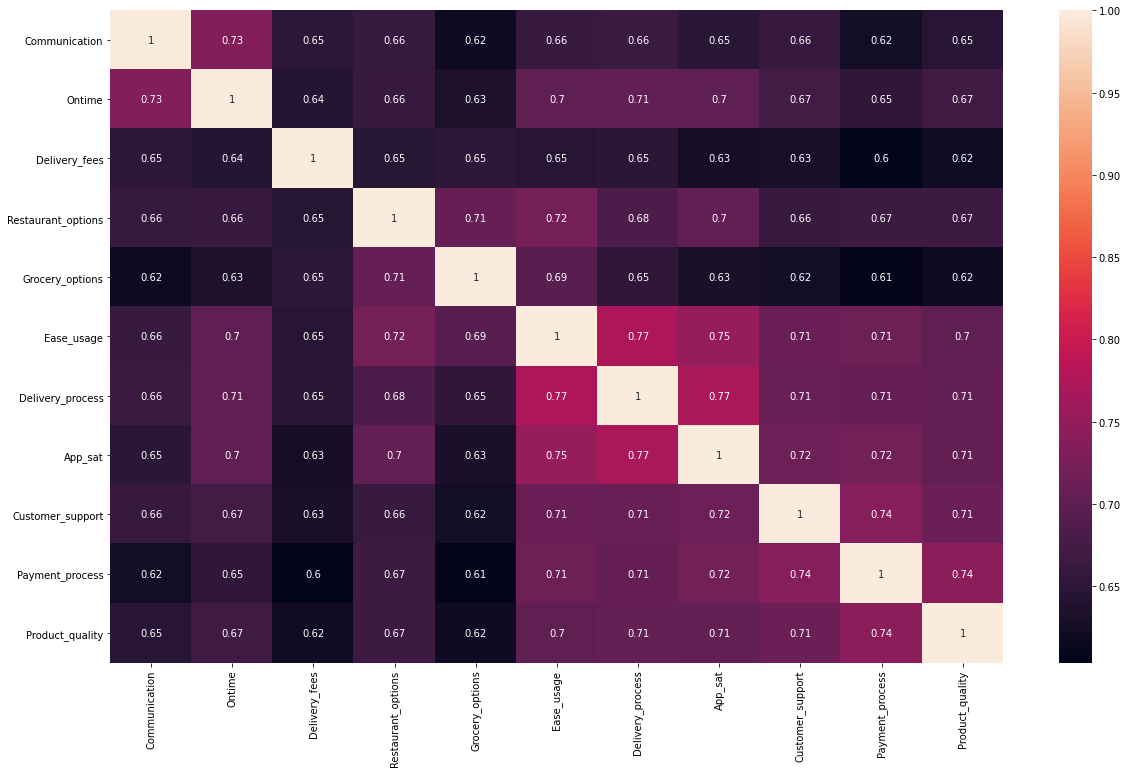

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(gg.corr(), annot = True)

In [18]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state= 10)

In [19]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model1.score(x_test,y_test)

0.487453263685423

In [21]:
model1.coef_

array([ 0.26670057,  0.12325255,  0.02933858, -0.01512153,  0.01729262,
        0.02693474, -0.00250937,  0.04191245,  0.03400599,  0.04457361,
        0.04109919, -0.06064933, -0.14242258, -0.065701  , -0.03055703,
        0.02761964, -0.01188124,  0.18293042,  0.07571604, -0.14828591,
        0.43241055, -0.20388244,  0.21324196, -0.34631155,  0.23218497,
       -0.00943113, -0.01277441,  0.14416785,  0.37803322,  0.12095572,
        0.05880884,  0.12665135, -0.09535388,  0.11771373,  0.11633027])

In [22]:
model1.intercept_

3.0230166850690603

In [23]:
!pip install relativeImp

In [24]:
from relativeImp import relativeImp

In [25]:
xNames = ['Communication', 'Ontime', 'Delivery_fees',
       'Restaurant_options', 'Grocery_options', 'Ease_usage',
       'Delivery_process', 'App_sat', 'Customer_support',
       'Payment_process', 'Product_quality']
yName = 'OSAT'

df_results = relativeImp(df, outcomeName = yName, driverNames = xNames)
df_results

,driver,rawRelaImpt,normRelaImpt
0,Communication,0.080771,19.457002
1,Ontime,0.052971,12.760284
2,Delivery_fees,0.032925,7.931408
3,Restaurant_options,0.029901,7.202933
4,Grocery_options,0.026322,6.340677
5,Ease_usage,0.032996,7.948543
6,Delivery_process,0.029547,7.117641
7,App_sat,0.032987,7.946229
8,Customer_support,0.031006,7.469082
9,Payment_process,0.031013,7.470725


In [26]:
from pandas import DataFrame
df_results.sort_values(by=['normRelaImpt'], ascending= False)

,driver,rawRelaImpt,normRelaImpt
0,Communication,0.080771,19.457002
1,Ontime,0.052971,12.760284
10,Product_quality,0.034686,8.355475
5,Ease_usage,0.032996,7.948543
7,App_sat,0.032987,7.946229
2,Delivery_fees,0.032925,7.931408
9,Payment_process,0.031013,7.470725
8,Customer_support,0.031006,7.469082
3,Restaurant_options,0.029901,7.202933
6,Delivery_process,0.029547,7.117641


In [27]:
! pip install semopy

     |████████████████████████████████| 153kB 7.5MB/s 
  Created wheel for semopy: filename=semopy-2.0.15-cp36-none-any.whl size=152552 sha256=7493d2133a68ccfe3aa5ccef4a3ebe7eeffd0eea232b9315334b01be8cd5b415
  Stored in directory: /root/.cache/pip/wheels/3a/43/01/9ab1f86e27d5a7fe90dc26c52115ffddd6d262a7d857cc688d
Successfully built semopy


In [28]:

import io
